In [257]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns; sns.set() 
from scipy import stats

In [160]:
train= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/train.csv')
test= pd.read_csv('C://Users/Saba Naseem/Desktop/kaggle/House Price Predicion/test.csv')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


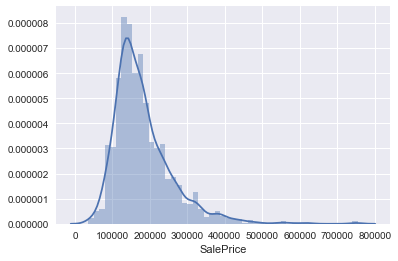

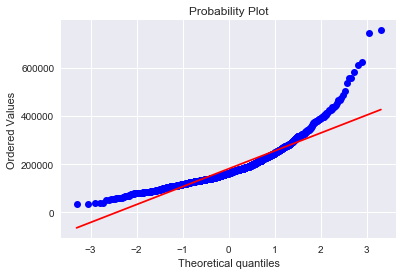

In [6]:
sns.distplot(train.SalePrice)
fig = plt.figure(figsize=[6,4])
res = stats.probplot(train['SalePrice'], plot=plt)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


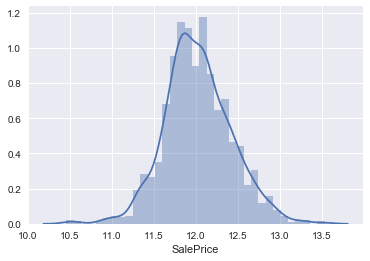

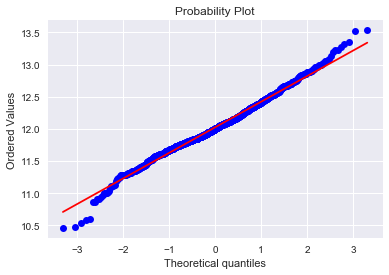

In [7]:
sns.distplot(np.log(train.SalePrice))
fig = plt.figure(figsize=[6,4])
res = stats.probplot(np.log(train.SalePrice), plot=plt)

In [161]:
data= pd.concat([train.drop(['SalePrice'], axis=1), test])

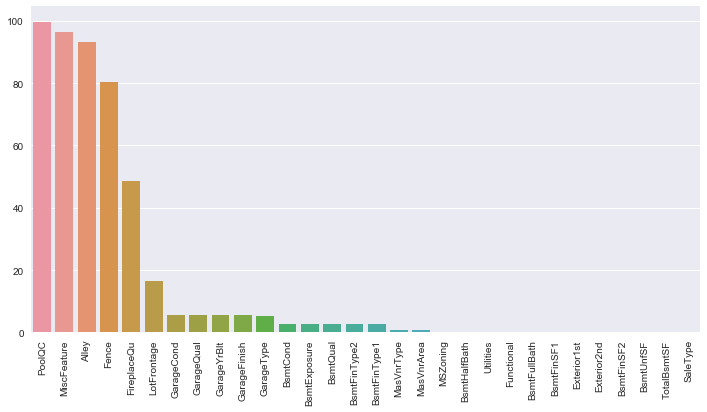

In [162]:
xx= (data.isnull().sum())/len(data)*100
xx=xx.sort_values(ascending=False).head(30)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(xx.keys(), xx)

In [163]:
total=data.isnull().sum().sort_values(ascending=False)
percent=((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing= pd.concat([total,percent], axis=1, join='outer', keys=['Total missing count', 'Percentage '])
missing.head(35)

,Total missing count,Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


In [11]:
data[data['PoolArea']!=0][['Id','PoolArea', 'PoolQC','OverallQual']]

,Id,PoolArea,PoolQC,OverallQual
197,198,512,Ex,8
810,811,648,Fa,6
1170,1171,576,Gd,6
1182,1183,555,Ex,10
1298,1299,480,Gd,10
1386,1387,519,Fa,7
1423,1424,738,Gd,6
514,1975,144,Ex,10
960,2421,368,NaN,4
1043,2504,444,NaN,6


In [164]:
test.loc[960, 'PoolQC']='Fa'
test.loc[1043, 'PoolQC']='Gd'
test.loc[1139, 'PoolQC']='Fa'

train['PoolQC'].fillna('None', inplace=True)
test['PoolQC'].fillna('None', inplace=True)

In [13]:
data[data['MiscVal']>10000][['Id','MiscFeature', 'MiscVal','OverallQual']]

,Id,MiscFeature,MiscVal,OverallQual
346,347,Gar2,15500,6
1,1462,Gar2,12500,6
1089,2550,NaN,17000,10


In [165]:
test[test['Id']==2550]['MiscFeature']

train['MiscFeature'].fillna('None', inplace=True)
test['MiscFeature'].fillna('None', inplace=True)

In [15]:
data[data['Fireplaces']==0][['Id','Fireplaces','FireplaceQu']]

,Id,Fireplaces,FireplaceQu
0,1,0,NaN
5,6,0,NaN
10,11,0,NaN
12,13,0,NaN
15,16,0,NaN
17,18,0,NaN
18,19,0,NaN
19,20,0,NaN
26,27,0,NaN
29,30,0,NaN


In [166]:
train['FireplaceQu'].fillna('None', inplace=True)
test['FireplaceQu'].fillna('None', inplace=True)

In [17]:
data['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [167]:
print(train['LotFrontage'].mean())
print(test['LotFrontage'].mean())

70.04995836802665
68.58035714285714


In [168]:
train['LotFrontage'].fillna(70, inplace=True)
test['LotFrontage'].fillna(68, inplace=True)

In [21]:
data[data['GarageQual'].isnull()==True][['Id','GarageCars','GarageArea','GarageQual','GarageCond','GarageYrBlt','GarageType']]

,Id,GarageCars,GarageArea,GarageQual,GarageCond,GarageYrBlt,GarageType
39,40,0.0,0.0,NaN,NaN,NaN,NaN
48,49,0.0,0.0,NaN,NaN,NaN,NaN
78,79,0.0,0.0,NaN,NaN,NaN,NaN
88,89,0.0,0.0,NaN,NaN,NaN,NaN
89,90,0.0,0.0,NaN,NaN,NaN,NaN
99,100,0.0,0.0,NaN,NaN,NaN,NaN
108,109,0.0,0.0,NaN,NaN,NaN,NaN
125,126,0.0,0.0,NaN,NaN,NaN,NaN
127,128,0.0,0.0,NaN,NaN,NaN,NaN
140,141,0.0,0.0,NaN,NaN,NaN,NaN


In [169]:
train['GarageQual'].fillna('None', inplace=True)
test['GarageQual'].fillna('None', inplace=True)
train['GarageFinish'].fillna('None', inplace=True)
test['GarageFinish'].fillna('None', inplace=True)
train['GarageYrBlt'].fillna('None', inplace=True)
test['GarageYrBlt'].fillna('None', inplace=True)
train['GarageType'].fillna('None', inplace=True)
test['GarageType'].fillna('None', inplace=True)
train['GarageCond'].fillna('None', inplace=True)
test['GarageCond'].fillna('None', inplace=True)

In [170]:
test.loc[test['Id']==2577, 'GarageType']='None'

In [23]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtCond'].isnull()==True)][['Id','TotalBsmtSF','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtCond,BsmtQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
580,2041,1426.0,NaN,Gd,Mn,Rec,GLQ,1044.0,382.0,0.0
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,2186,1127.0,NaN,TA,No,Unf,BLQ,1033.0,0.0,94.0
1064,2525,995.0,NaN,TA,Av,Unf,ALQ,755.0,0.0,240.0


In [171]:
test.loc[test['Id']==2041, 'BsmtCond']='Gd'
test.loc[test['Id']==2186, 'BsmtCond']='TA'
test.loc[test['Id']==2525, 'BsmtCond']='TA'

train['BsmtCond'].fillna('None', inplace=True)
test['BsmtCond'].fillna('None', inplace=True)

In [26]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtExposure'].isnull()==True)][['Id','TotalBsmtSF','BsmtCond','BsmtQual','BsmtExposure']]

,Id,TotalBsmtSF,BsmtCond,BsmtQual,BsmtExposure
948,949,936.0,TA,Gd,NaN
27,1488,1595.0,TA,Gd,NaN
660,2121,NaN,NaN,NaN,NaN
888,2349,725.0,TA,Gd,NaN


In [172]:
train['BsmtExposure'].fillna('None', inplace=True)
test['BsmtExposure'].fillna('None', inplace=True)

In [28]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtQual'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,2218,173.0,NaN,Fa,No,Unf,Unf,0.0,0.0,173.0
758,2219,356.0,NaN,TA,No,Unf,Unf,0.0,0.0,356.0


In [173]:
test.loc[test['Id']==2218, 'BsmtQual']='Fa'
test.loc[test['Id']==2219, 'BsmtQual']='TA'

train['BsmtQual'].fillna('None', inplace=True)
test['BsmtQual'].fillna('None', inplace=True)

In [30]:
data[(data['TotalBsmtSF']!=0) & (data['BsmtFinType2'].isnull()==True)][['Id','TotalBsmtSF','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','BsmtFinSF2','BsmtUnfSF']]

,Id,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,BsmtFinSF2,BsmtUnfSF
332,333,3206.0,Gd,TA,No,NaN,479.0,1603.0
660,2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
train.loc[train['Id']==333, 'BsmtFinType2']='Unf'

train['BsmtFinType2'].fillna('None', inplace=True)
test['BsmtFinType2'].fillna('None', inplace=True)

In [175]:
train['BsmtFinType1'].fillna('None', inplace=True)
test['BsmtFinType1'].fillna('None', inplace=True)

test['BsmtHalfBath'].fillna(0, inplace=True)

test['BsmtFullBath'].fillna(0, inplace=True)

test['BsmtFinSF1'].fillna(0, inplace=True)

test['BsmtFinSF2'].fillna(0, inplace=True)

test['BsmtUnfSF'].fillna(0, inplace=True)

test['TotalBsmtSF'].fillna(0, inplace=True)

In [176]:
train['MasVnrType'].fillna('None', inplace=True)

test['MasVnrType'].fillna('None', inplace=True)

train['MasVnrArea'].fillna(0, inplace=True)

test['MasVnrArea'].fillna(0, inplace=True)

In [177]:
test['MSZoning'].fillna(test['MSZoning'].mode, inplace=True)

test['Utilities'].fillna(test['Utilities'].mode, inplace=True)

test['GarageCars'].fillna(0, inplace=True)

test['GarageArea'].fillna(0, inplace=True)

train['Fence'].fillna('None', inplace=True)

test['Fence'].fillna('None', inplace=True)

train['Alley'].fillna('None', inplace=True)

test['Alley'].fillna('None', inplace=True)

In [178]:
print(test['Functional'].mode())
print(test['SaleType'].mode())
print(test['Exterior1st'].mode())
print(test['KitchenQual'].mode())
print(test['Exterior2nd'].mode())

0    Typ
dtype: object
0    WD
dtype: object
0    VinylSd
dtype: object
0    TA
dtype: object
0    VinylSd
dtype: object


In [179]:
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)

In [43]:
train['Electrical'].mode()

0    SBrkr
dtype: object

In [180]:
train['Electrical'].fillna('SBrkr', inplace=True)

In [181]:
print(train.isnull().sum().sort_values(ascending=False).head(5))
print(test.isnull().sum().sort_values(ascending=False).head(5))

SalePrice      0
Heating        0
RoofStyle      0
RoofMatl       0
Exterior1st    0
dtype: int64
SaleCondition    0
SaleType         0
RoofStyle        0
RoofMatl         0
Exterior1st      0
dtype: int64


In [182]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [183]:
train.to_csv("train_cleaned.csv", index=False)

In [184]:
train_=train
test_=test

### Normalization

In [185]:
train=train_

In [246]:
num=pd.DataFrame()
cat=pd.DataFrame()

In [247]:
for c in train:
    
    if train[c].dtypes=='object':
        cat[c]= train[c].factorize()[0]
    else:
        num[c]=train[c]

In [248]:
num.shape, cat.shape

((1460, 37), (1460, 44))

In [249]:
num.drop('SalePrice', axis=1, inplace=True)

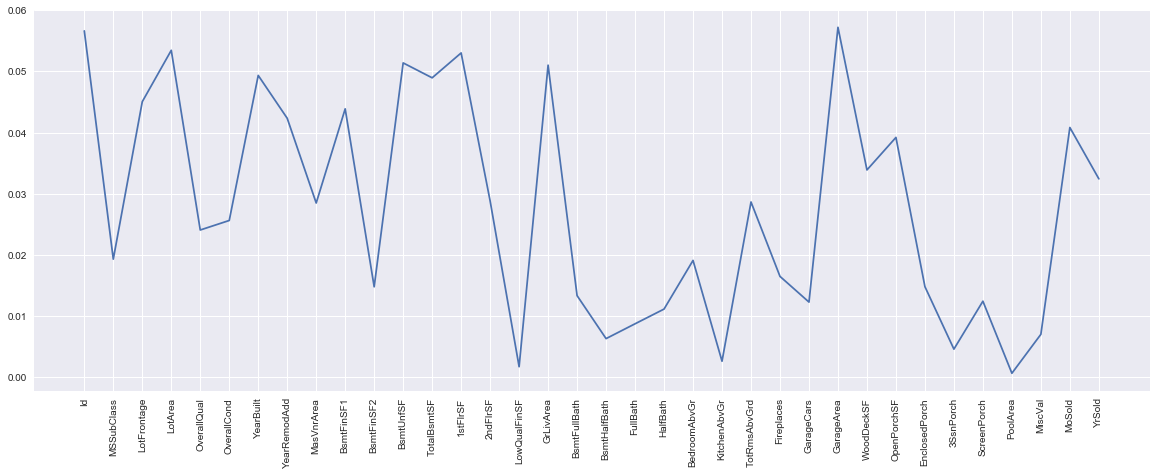

In [259]:
scaler= StandardScaler()
scaler.fit(num)
x=scaler.transform(num)

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)

rf = RandomForestClassifier()
rf.fit(x,training_scores_encoded)

plt.figure(figsize=[20,7])
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(num.shape[1]), num.columns.tolist(), rotation=90);

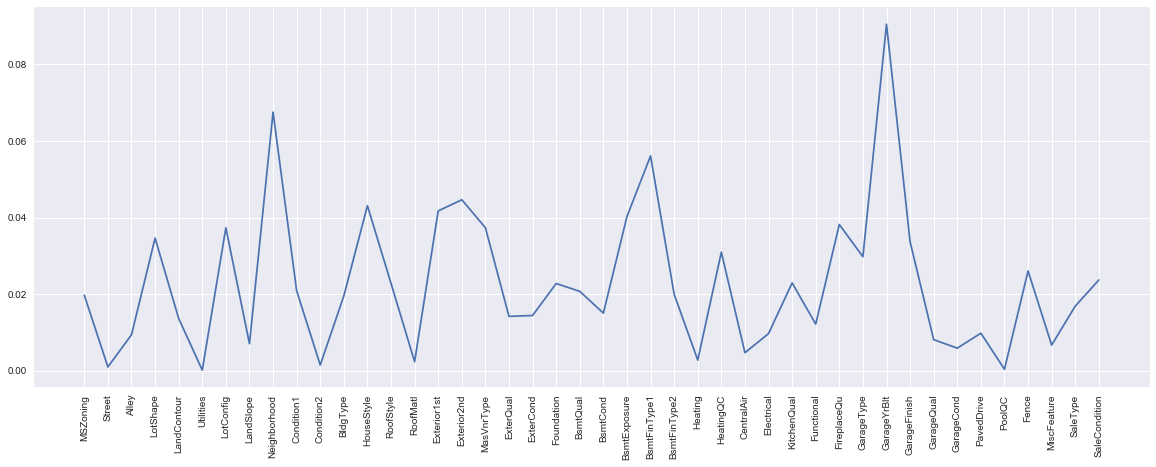

In [260]:
scaler= StandardScaler()
scaler.fit(cat)
x=scaler.transform(cat)

lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y)

rf = RandomForestClassifier()
rf.fit(x,training_scores_encoded)

plt.figure(figsize=[20,7])
plt.plot(rf.feature_importances_)
plt.xticks(np.arange(cat.shape[1]), cat.columns.tolist(), rotation=90);

In [ ]:
cat.c